# Combinar PCA con RFF y Decision Tree

Es curioso que Logit tenga mejores resultados que Decision Tree, si Logit es lineal y DT no lo es. Quizá es porque la "línea" que separa las clases es más bien "diagonal", y eso no es muy adecuado para árboles <br/>
Vamos a usar PCA para ver si hacemos la línea más adecuada para DT

In [1]:
from sklearn.decomposition import PCA
from sklearn import datasets
import math
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

from sklearn.kernel_approximation import RBFSampler
import matplotlib.pyplot as plt

from sklearn.kernel_approximation import RBFSampler


from sklearn.kernel_approximation import Nystroem

In [2]:
sample_sizes = 30 * np.arange(1, 30)

## DT Normal

In [3]:
digits = datasets.load_digits()

In [4]:
data = digits.data
target = digits.target

In [5]:
data /= 16
data -= data.mean(axis = 0)

In [6]:
N = data.shape[0]
prop_train = 2 / 3
N_train = math.ceil(N * prop_train)
N_test = N - N_train

In [7]:
data_train = data[:N_train]
data_test = data[N_train:]

target_train = target[:N_train]
target_test = target[N_train:]

In [8]:
dtc = DecisionTreeClassifier()

In [9]:
dtc.fit(data_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
dtc_train_score = dtc.score(data_train, target_train)
dtc_test_score = dtc.score(data_test, target_test)

In [11]:
dtc_train_score, dtc_test_score

(1.0, 0.7662771285475793)

## DT con PCA

In [12]:
digits = datasets.load_digits()

In [13]:
data = digits.data
target = digits.target

In [14]:
data /= 16
data -= data.mean(axis = 0)

In [15]:
N = data.shape[0]
prop_train = 2 / 3
N_train = math.ceil(N * prop_train)
N_test = N - N_train

In [16]:
data_train = data[:N_train]
data_test = data[N_train:]

In [17]:
target_train = target[:N_train]
target_test = target[N_train:]

In [18]:
pipe = Pipeline([
        ("pca", PCA(n_components = 0.9, svd_solver = "full")),
        ("dt", DecisionTreeClassifier())
    ])

In [19]:
pipe.fit(data_train, target_train)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [20]:
dtc_pca_train_score = pipe.score(data_train, target_train)
dtc_pca_test_score = pipe.score(data_test, target_test)

In [21]:
dtc_pca_train_score, dtc_pca_test_score

(1.0, 0.8130217028380634)

### Conclusión

En general, hacer PCA mejora un poquitín el DT original, pero no demasiado. Pasa aprox. de 0.75 a 0.80

## DT con RFF

In [22]:
digits = datasets.load_digits()

In [23]:
data = digits.data
target = digits.target

In [24]:
data /= 16
data -= data.mean(axis = 0)

In [25]:
N = data.shape[0]
prop_train = 2 / 3
N_train = math.ceil(N * prop_train)
N_test = N - N_train

In [26]:
data_train = data[:N_train]
data_test = data[N_train:]

In [27]:
target_train = target[:N_train]
target_test = target[N_train:]

In [28]:
pipe = Pipeline([
        ("rff", RBFSampler(gamma=.2)),
        ("dtc", DecisionTreeClassifier()),
    ])

In [29]:
rff_dt_scores = []

for D in sample_sizes:
    pipe.set_params(rff__n_components = D)
    
    
    pipe.fit(data_train, target_train)
    
    score = pipe.score(data_test, target_test)
    
    rff_dt_scores.append(score)

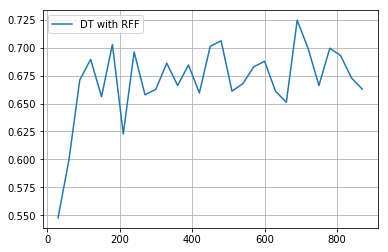

In [30]:
accuracy = plt.subplot(111)
accuracy.plot(sample_sizes, rff_dt_scores, label = "DT with RFF")
accuracy.grid(True)
accuracy.legend(loc="best")

## DT con Nÿstroem

In [31]:
digits = datasets.load_digits()

In [32]:
data = digits.data
target = digits.target

In [33]:
data /= 16
data -= data.mean(axis = 0)

In [34]:
N = data.shape[0]
prop_train = 2 / 3
N_train = math.ceil(N * prop_train)
N_test = N - N_train

In [35]:
data_train = data[:N_train]
data_test = data[N_train:]

target_train = target[:N_train]
target_test = target[N_train:]

In [36]:
pipe = Pipeline([
        ("nystroem", Nystroem(gamma=.2)),
        ("dtc", DecisionTreeClassifier()),
    ])

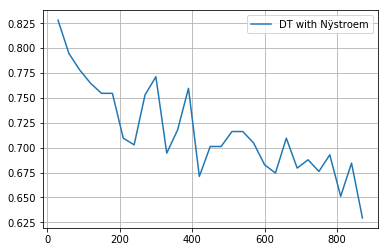

In [37]:
nys_dt_scores = []

for D in sample_sizes:
    pipe.set_params(nystroem__n_components = D)
    
    
    pipe.fit(data_train, target_train)
    
    score = pipe.score(data_test, target_test)
    
    nys_dt_scores.append(score)

accuracy = plt.subplot(111)
accuracy.plot(sample_sizes, nys_dt_scores, label = "DT with Nÿstroem")
accuracy.grid(True)
accuracy.legend(loc="best")

## PCA >> RFF >> DT

In [38]:
digits = datasets.load_digits()

In [39]:
data = digits.data
target = digits.target

In [40]:
data /= 16
data -= data.mean(axis = 0)

In [41]:
N = data.shape[0]
prop_train = 2 / 3
N_train = math.ceil(N * prop_train)
N_test = N - N_train

In [42]:
data_train = data[:N_train]
data_test = data[N_train:]

In [43]:
target_train = target[:N_train]
target_test = target[N_train:]

In [44]:
pipe = Pipeline([
        
        ("pca", PCA(n_components = 0.9, svd_solver = "full")),
        ("rff", RBFSampler(gamma=.2)),
        ("dtc", DecisionTreeClassifier()),
    ])

In [45]:
pca_rff_dt_scores = []

for D in sample_sizes:
    pipe.set_params(rff__n_components = D)
    
    
    pipe.fit(data_train, target_train)
    
    score = pipe.score(data_test, target_test)
    
    pca_rff_dt_scores.append(score)

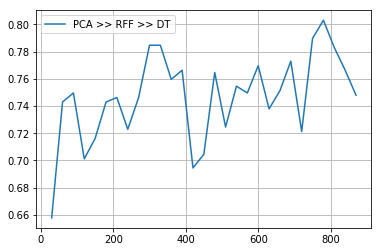

In [46]:
accuracy = plt.subplot(111)
accuracy.plot(sample_sizes, pca_rff_dt_scores, label = "PCA >> RFF >> DT")
accuracy.grid(True)
accuracy.legend(loc="best")

## PCA >> Nystroem >> DT

In [47]:
digits = datasets.load_digits()

In [48]:
data = digits.data
target = digits.target

In [49]:
data /= 16
data -= data.mean(axis = 0)

In [50]:
N = data.shape[0]
prop_train = 2 / 3
N_train = math.ceil(N * prop_train)
N_test = N - N_train

In [51]:
data_train = data[:N_train]
data_test = data[N_train:]

In [52]:
target_train = target[:N_train]
target_test = target[N_train:]

In [53]:
pipe = Pipeline([
        
        ("pca", PCA(n_components = 0.9, svd_solver = "full")),
        ("nystroem", Nystroem(gamma=.2)),
        ("dtc", DecisionTreeClassifier()),
    ])

In [54]:
pca_nys_dt_scores = []

for D in sample_sizes:
    pipe.set_params(nystroem__n_components = D)
    
    
    pipe.fit(data_train, target_train)
    
    score = pipe.score(data_test, target_test)
    
    pca_nys_dt_scores.append(score)

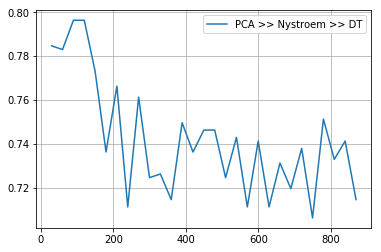

In [55]:
accuracy = plt.subplot(111)
accuracy.plot(sample_sizes, pca_nys_dt_scores, label = "PCA >> Nystroem >> DT")
accuracy.grid(True)
accuracy.legend(loc="best")

## RFF >> PCA >> DT

In [56]:
digits = datasets.load_digits()

In [57]:
data = digits.data
target = digits.target

In [58]:
data /= 16
data -= data.mean(axis = 0)

In [59]:
N = data.shape[0]
prop_train = 2 / 3
N_train = math.ceil(N * prop_train)
N_test = N - N_train

In [60]:
data_train = data[:N_train]
data_test = data[N_train:]

In [61]:
target_train = target[:N_train]
target_test = target[N_train:]

In [62]:
pipe = Pipeline([
        ("rff", RBFSampler(gamma=.2)),
        ("pca", PCA(n_components = 0.9, svd_solver = "full")),
        ("dtc", DecisionTreeClassifier()),
    ])

In [63]:
rff_pca_dt_scores = []

for D in sample_sizes:
    pipe.set_params(rff__n_components = D)
    
    
    pipe.fit(data_train, target_train)
    
    score = pipe.score(data_test, target_test)
    
    rff_pca_dt_scores.append(score)

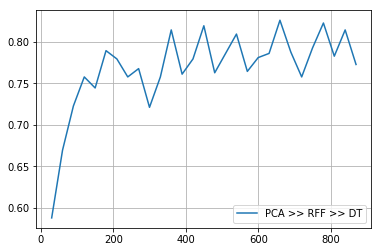

In [64]:
accuracy = plt.subplot(111)
accuracy.plot(sample_sizes, rff_pca_dt_scores, label = "PCA >> RFF >> DT")
accuracy.grid(True)
accuracy.legend(loc="best")

## Nystroem >> PCA >> DT

In [65]:
digits = datasets.load_digits()

In [66]:
data = digits.data
target = digits.target

In [67]:
data /= 16
data -= data.mean(axis = 0)

In [68]:
N = data.shape[0]
prop_train = 2 / 3
N_train = math.ceil(N * prop_train)
N_test = N - N_train

In [69]:
data_train = data[:N_train]
data_test = data[N_train:]

In [70]:
target_train = target[:N_train]
target_test = target[N_train:]

In [71]:
pipe = Pipeline([
        ("nystroem", Nystroem(gamma=.2)),
        ("pca", PCA(n_components = 0.9, svd_solver = "full")),
        ("dtc", DecisionTreeClassifier()),
    ])

In [72]:
nys_pca_dt_scores = []

In [73]:
for D in sample_sizes:
    pipe.set_params(nystroem__n_components = D)
    
    
    pipe.fit(data_train, target_train)
    
    score = pipe.score(data_test, target_test)
    
    nys_pca_dt_scores.append(score)

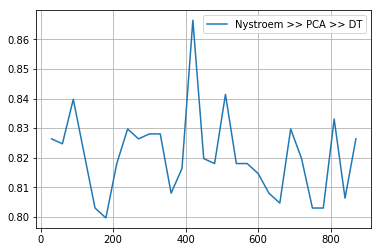

In [74]:
accuracy = plt.subplot(111)
accuracy.plot(sample_sizes, nys_pca_dt_scores, label = "Nystroem >> PCA >> DT")
accuracy.grid(True)
accuracy.legend(loc="best")

## Todos los resultados juntos

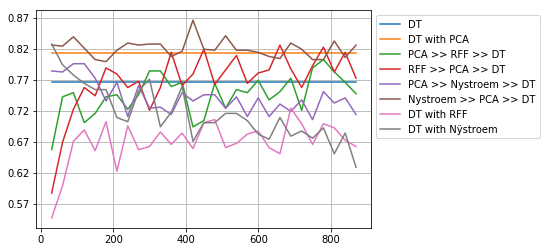

In [79]:
accuracy = plt.subplot(111)

accuracy.plot([sample_sizes[0], sample_sizes[-1]], [dtc_test_score, dtc_test_score], label = "DT")
accuracy.plot([sample_sizes[0], sample_sizes[-1]], [dtc_pca_test_score, dtc_pca_test_score], label = "DT with PCA")
accuracy.plot(sample_sizes, pca_rff_dt_scores, label = "PCA >> RFF >> DT")
accuracy.plot(sample_sizes, rff_pca_dt_scores, label = "RFF >> PCA >> DT")
accuracy.plot(sample_sizes, pca_nys_dt_scores, label = "PCA >> Nystroem >> DT")
accuracy.plot(sample_sizes, nys_pca_dt_scores, label = "Nystroem >> PCA >> DT")
accuracy.plot(sample_sizes, rff_dt_scores, label = "DT with RFF")
accuracy.plot(sample_sizes, nys_dt_scores, label = "DT with Nÿstroem")

accuracy.yaxis.set_ticks(np.arange(0.57,0.9,0.05))

accuracy.grid(True)
accuracy.legend(loc="best", bbox_to_anchor=(1, 1))

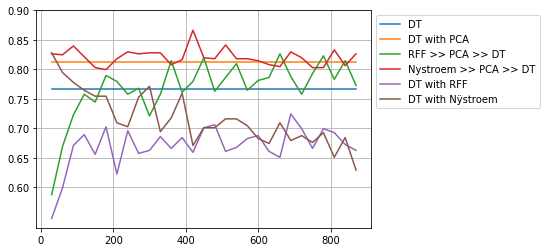

In [81]:
accuracy = plt.subplot(111)

accuracy.plot([sample_sizes[0], sample_sizes[-1]], [dtc_test_score, dtc_test_score], label = "DT")
accuracy.plot([sample_sizes[0], sample_sizes[-1]], [dtc_pca_test_score, dtc_pca_test_score], label = "DT with PCA")
#accuracy.plot(sample_sizes, pca_rff_dt_scores, label = "PCA >> RFF >> DT")
accuracy.plot(sample_sizes, rff_pca_dt_scores, label = "RFF >> PCA >> DT")
#accuracy.plot(sample_sizes, pca_nys_dt_scores, label = "PCA >> Nystroem >> DT")
accuracy.plot(sample_sizes, nys_pca_dt_scores, label = "Nystroem >> PCA >> DT")
accuracy.plot(sample_sizes, rff_dt_scores, label = "DT with RFF")
accuracy.plot(sample_sizes, nys_dt_scores, label = "DT with Nÿstroem")



accuracy.yaxis.set_ticks(np.arange(0.60,0.9,0.05))

accuracy.grid(True)
accuracy.legend(loc="best", bbox_to_anchor=(1, 1))